In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import *
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [13]:
dataset = pd.read_csv("bike_sharing.csv")
dataset = dataset.drop(columns="dteday")
dataset.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


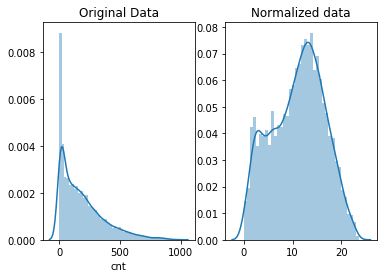

In [14]:
# now transforming feature variable
from scipy import stats
x_normalized_data = stats.boxcox(dataset["cnt"])
fig, ax=plt.subplots(1,2)
sns.distplot(dataset["cnt"], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(x_normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")
x_normalized_data = x_normalized_data[0].reshape(len(x_normalized_data[0]), 1)
dataset.cnt = x_normalized_data

In [15]:
x_data_set = np.array(dataset.drop(columns=['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'], axis=0))
y_data_set = np.array(pd.DataFrame(dataset.cnt))

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_data_set, y_data_set)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

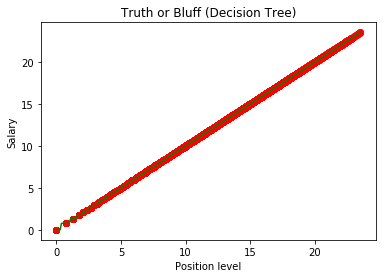

In [17]:
X_grid = np.arange(min(x_data_set), max(x_data_set), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(x_data_set, y_data_set, color ='red')
plt.plot(X_grid, regressor.predict(X_grid), color ='green')
plt.title('Truth or Bluff (Decision Tree)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



In [18]:
pred = regressor.predict(X_grid)
pred

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.77198372,
        0.77198372,  0.77198372,  0.77198372,  0.77198372,  0.77198372,
        0.77198372,  1.30540052,  1.30540052,  1.30540052,  1.30540052,
        1.30540052,  1.72599168,  1.72599168,  1.72599168,  1.72599168,
        2.07865132,  2.07865132,  2.07865132,  2.38518158,  2.38518158,
        2.38518158,  2.65800446,  2.65800446,  2.90494295,  2.90494295,
        2.90494295,  3.1312768 ,  3.1312768 ,  3.34075538,  3.34075538,
        3.5361474 ,  3.5361474 ,  3.7195617 ,  3.7195617 ,  3.89264556,
        4.05671285,  4.05671285,  4.21283014,  4.36187639,  4.36187639,
        4.50458544,  4.64157697,  4.64157697,  4.77337954,  4.90044802,
        5.02317696,  5.14191106,  5.25695344,  5.25695344,  5.3685722 ,
        5.47700573,  5.5824671 ,  5.68514753,  5.78521943,  5.88283878,
        5.97814725,  6.07127392,  6.16233676,  6.33869485,  6.42418109,
        6.50798729,  6.5901918 ,  6.67086729,  6.82789695,  6.90